In [ ]:
!pip install pandas sqlalchemy


In [2]:
# ==============================================================
# 🎬 NETFLIX DATA ENGINEERING + ML INSIGHTS PIPELINE
# ==============================================================

# setup and data loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Create folders
os.makedirs("output/charts", exist_ok=True)

# Load dataset
df = pd.read_csv("/content/netflix_content.csv", dtype=str)
print("✅ Dataset loaded successfully.")


✅ Dataset loaded successfully.


In [3]:
# ETL: cleaning and transformation


# ---------- Clean numeric field ----------
df["Hours Viewed"] = (
    df["Hours Viewed"].astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
)
df["Hours Viewed"] = pd.to_numeric(df["Hours Viewed"], errors="coerce")

# ---------- Clean dates ----------
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["release_year"] = df["Release Date"].dt.year
df["release_month"] = df["Release Date"].dt.month

# ---------- Standardize columns ----------
df = df.rename(columns={
    "Title": "title",
    "Available Globally?": "available_globally",
    "Language Indicator": "language",
    "Content Type": "content_type"
})

# ---------- Trim spaces ----------
str_cols = df.select_dtypes(include="object").columns
for c in str_cols:
    df[c] = df[c].astype(str).str.strip()

# ---------- Save cleaned version ----------
df.to_csv("output/cleaned_data.csv", index=False)
print("✅ Data cleaned and saved.")


✅ Data cleaned and saved.


In [4]:
#load into sqlite

engine = create_engine("sqlite:///output/netflix_cleaned.db")
df.to_sql("netflix", engine, if_exists="replace", index=False)
print("✅ Data stored in SQLite database.")


✅ Data stored in SQLite database.


/tmp/ipython-input-1091882966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="title", x="Hours Viewed", data=top10, palette="Reds_r")
/tmp/ipython-input-1091882966.py:9: UserWarning: Glyph 53433 (\N{HANGUL SYLLABLE KING}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.savefig("output/charts/top10_titles.png")
/tmp/ipython-input-1091882966.py:9: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.savefig("output/charts/top10_titles.png")
/tmp/ipython-input-1091882966.py:9: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.savefig("output/charts/top10_titles.png")
/tmp/ipython-input-1091882966.py:9: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout

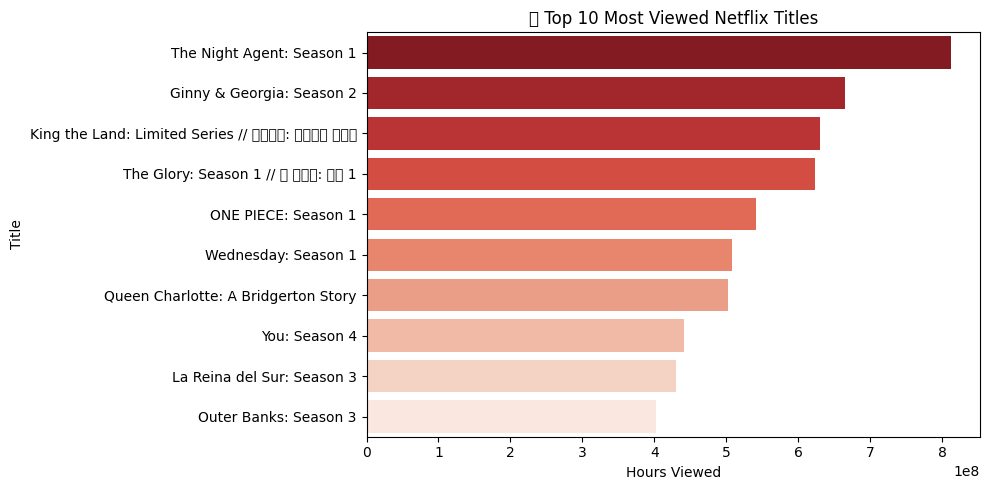

/tmp/ipython-input-1091882966.py:16: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.savefig("output/charts/content_type_split.png"); plt.show()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


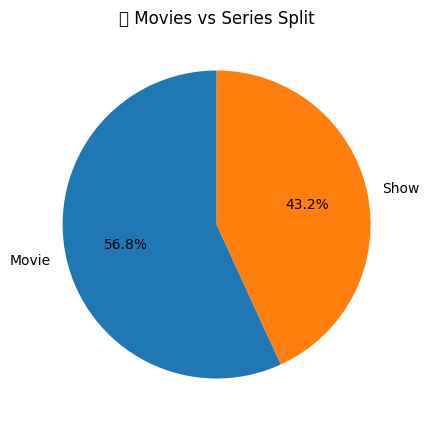

/tmp/ipython-input-1091882966.py:22: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.savefig("output/charts/global_vs_local.png"); plt.show()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


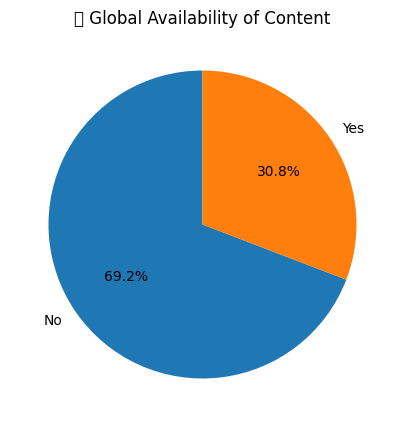

/tmp/ipython-input-1091882966.py:31: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.savefig("output/charts/releases_over_years.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


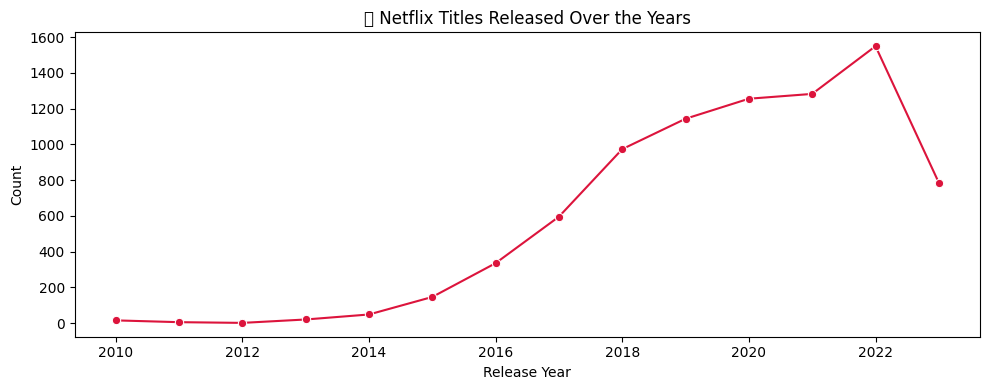

/tmp/ipython-input-1091882966.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Hours Viewed", y="language", data=lang_stats, palette="coolwarm")
/tmp/ipython-input-1091882966.py:39: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.savefig("output/charts/top_languages.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


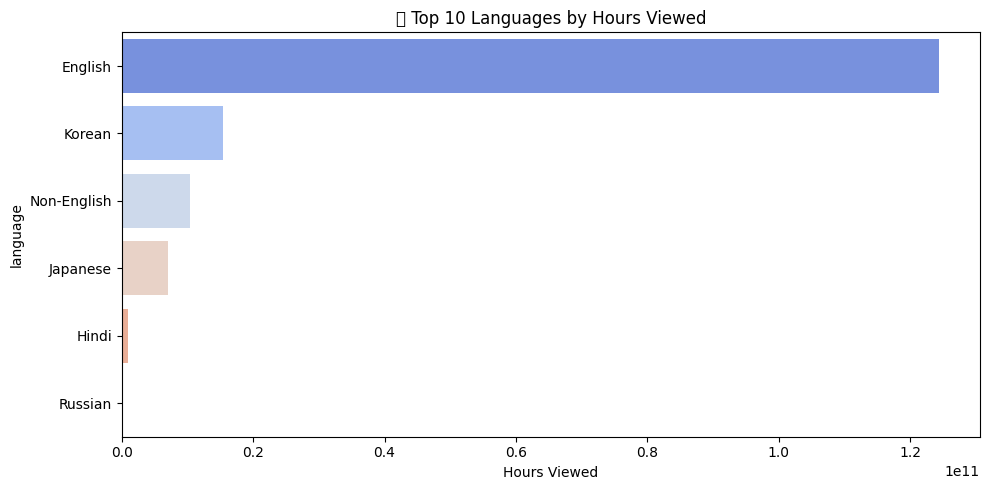

/tmp/ipython-input-1091882966.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.savefig("output/charts/correlation_heatmap.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


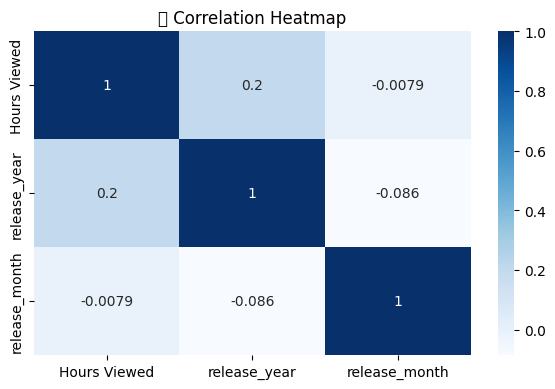

✅ Visualization completed. Charts saved in output/charts/


In [5]:
# Visualization & Insights

# ---------- 1. Top 10 Most Viewed Titles ----------
plt.figure(figsize=(10,5))
top10 = df.sort_values("Hours Viewed", ascending=False).head(10)
sns.barplot(y="title", x="Hours Viewed", data=top10, palette="Reds_r")
plt.title("🔥 Top 10 Most Viewed Netflix Titles")
plt.xlabel("Hours Viewed"); plt.ylabel("Title")
plt.tight_layout(); plt.savefig("output/charts/top10_titles.png")
plt.show()

# ---------- 2. Content Type Distribution ----------
plt.figure(figsize=(5,5))
df['content_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("🎭 Movies vs Series Split"); plt.ylabel('')
plt.savefig("output/charts/content_type_split.png"); plt.show()

# ---------- 3. Global vs Local Availability ----------
plt.figure(figsize=(5,5))
df['available_globally'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("🌍 Global Availability of Content"); plt.ylabel('')
plt.savefig("output/charts/global_vs_local.png"); plt.show()

# ---------- 4. Releases Over the Years ----------
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
yearly = df.groupby('release_year')['title'].count().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(x='release_year', y='title', data=yearly, marker='o', color='crimson')
plt.title("📅 Netflix Titles Released Over the Years")
plt.xlabel("Release Year"); plt.ylabel("Count")
plt.tight_layout(); plt.savefig("output/charts/releases_over_years.png")
plt.show()

# ---------- 5. Top 10 Languages ----------
lang_stats = df.groupby("language")["Hours Viewed"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="Hours Viewed", y="language", data=lang_stats, palette="coolwarm")
plt.title("🌐 Top 10 Languages by Hours Viewed")
plt.tight_layout(); plt.savefig("output/charts/top_languages.png")
plt.show()

# ---------- 6. Correlation Heatmap ----------
plt.figure(figsize=(6,4))
sns.heatmap(df[['Hours Viewed','release_year','release_month']].corr(), annot=True, cmap='Blues')
plt.title("📊 Correlation Heatmap")
plt.tight_layout(); plt.savefig("output/charts/correlation_heatmap.png")
plt.show()

print("✅ Visualization completed. Charts saved in output/charts/")


/tmp/ipython-input-3894683545.py:14: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.savefig("output/charts/clusters.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


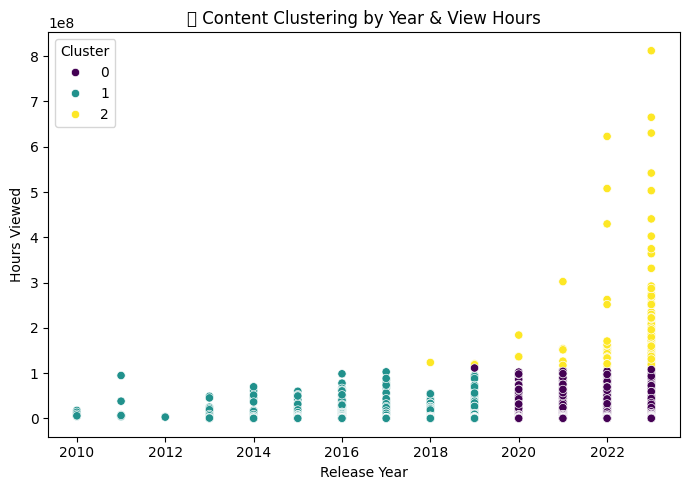

✅ K-Means clustering done.


In [6]:
#clustering

ml_df = df[['Hours Viewed', 'release_year']].dropna()
scaler = StandardScaler()
scaled = scaler.fit_transform(ml_df)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
ml_df['Cluster'] = kmeans.fit_predict(scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x='release_year', y='Hours Viewed', hue='Cluster', data=ml_df, palette='viridis')
plt.title("🎯 Content Clustering by Year & View Hours")
plt.xlabel("Release Year"); plt.ylabel("Hours Viewed")
plt.tight_layout(); plt.savefig("output/charts/clusters.png")
plt.show()

ml_df.to_csv("output/clusters.csv", index=False)
print("✅ K-Means clustering done.")


In [7]:
#regression

df['content_type'] = df['content_type'].astype('category').cat.codes
df['available_globally'] = df['available_globally'].astype('category').cat.codes

X = df[['release_year', 'content_type', 'available_globally']].fillna(0)
y = df['Hours Viewed'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"🔍 R² Score: {r2:.3f}")
print(f"📉 MAE: {mae:.2f}")


🔍 R² Score: 0.053
📉 MAE: 7141121.15


/tmp/ipython-input-3525340784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


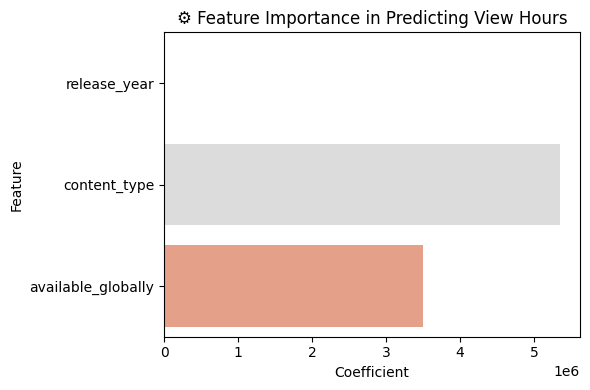

✅ Regression results saved.


In [8]:
#feature importance visualization

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
plt.figure(figsize=(6,4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("⚙️ Feature Importance in Predicting View Hours")
plt.tight_layout(); plt.savefig("output/charts/feature_importance.png")
plt.show()

coef_df.to_csv("output/regression_coefficients.csv", index=False)
print("✅ Regression results saved.")


In [9]:
from google.colab import files
!zip -r netflix_project_outputs.zip output
files.download("netflix_project_outputs.zip")


  adding: output/ (stored 0%)
  adding: output/cleaned_data.csv (deflated 70%)
  adding: output/netflix_cleaned.db (deflated 61%)
  adding: output/regression_coefficients.csv (deflated 13%)
  adding: output/clusters.csv (deflated 89%)
  adding: output/charts/ (stored 0%)
  adding: output/charts/correlation_heatmap.png (deflated 10%)
  adding: output/charts/clusters.png (deflated 6%)
  adding: output/charts/top10_titles.png (deflated 17%)
  adding: output/charts/global_vs_local.png (deflated 8%)
  adding: output/charts/releases_over_years.png (deflated 10%)
  adding: output/charts/content_type_split.png (deflated 8%)
  adding: output/charts/feature_importance.png (deflated 17%)
  adding: output/charts/top_languages.png (deflated 22%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>